In [663]:
# importações

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [664]:
# Carregar dados

df_dsa = pd.read_csv('datasetnovo.csv')
df_dsa

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0
...,...,...
495,58.0,6259.0
496,34.0,6099.0
497,47.0,6170.0
498,37.0,5064.0


In [665]:
df_dsa.shape

(500, 2)

In [666]:
df_dsa.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [667]:
df_dsa.head(5)

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [668]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [669]:
df_dsa.isnull().sum()

,0
horas_estudo_mes,0
salario,0


In [670]:
df_dsa.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [671]:
df_dsa.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [672]:
df_dsa["horas_estudo_mes"].describe()

,horas_estudo_mes
count,500.000000
mean,50.060000
std,14.659406
min,1.000000
25%,39.750000
50%,50.000000
75%,60.000000
max,100.000000


<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

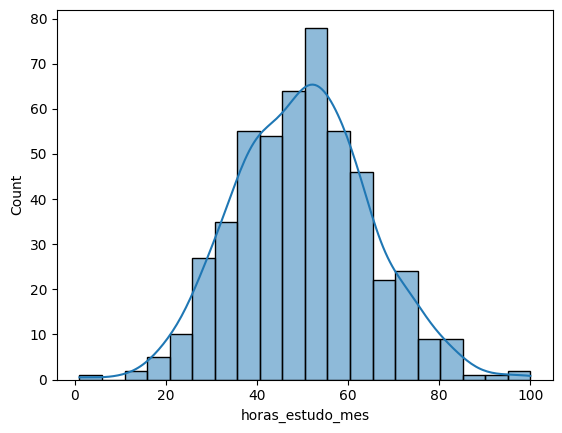

In [673]:
# Historiograma da variavel preditora

sns.histplot(data = df_dsa, x = "horas_estudo_mes", kde = True)

In [674]:
# Preparação de Dados

X = np.array(df_dsa['horas_estudo_mes'])

In [675]:
X

array([ 57.,  48.,  60.,  73.,  46.,  46.,  74.,  62.,  43.,  58.,  43.,
        43.,  54.,  21.,  24.,  42.,  35.,  55.,  36.,  29.,  72.,  47.,
        51.,  29.,  42.,  52.,  33.,  56.,  41.,  46.,  41.,  78.,  50.,
        34.,  62.,  32.,  53.,  21.,  30.,  53.,  61.,  53.,  48.,  45.,
        28.,  39.,  43.,  66.,  55.,  24.,  55.,  44.,  40.,  59.,  65.,
        64.,  37.,  45.,  55.,  65.,  43.,  47.,  33.,  32.,  62.,  70.,
        49.,  65.,  55.,  40.,  55.,  73.,  49.,  73.,  11.,  62.,  51.,
        46.,  51.,  20.,  47.,  55.,  72.,  42.,  38.,  42.,  64.,  55.,
        42.,  58.,  51.,  65.,  39.,  45.,  44.,  28.,  54.,  54.,  50.,
        46.,  29.,  44.,  45.,  38.,  48.,  56.,  78.,  53.,  54.,  49.,
        21.,  50.,  51.,  87.,  47.,  55.,  49.,  32.,  67.,  61.,  62.,
        36.,  71.,  29.,  59.,  83.,  35.,  42.,  51.,  42.,  27.,  51.,
        34.,  57.,  36.,  73.,  38.,  45.,  62.,  32.,  53.,  70.,  26.,
        53.,  54.,  62.,  31.,  30.,  58.,  54.,  5

In [676]:
# Ajusta o shape de X

X = X.reshape(-1,1)

In [677]:
X

array([[ 57.],
       [ 48.],
       [ 60.],
       [ 73.],
       [ 46.],
       [ 46.],
       [ 74.],
       [ 62.],
       [ 43.],
       [ 58.],
       [ 43.],
       [ 43.],
       [ 54.],
       [ 21.],
       [ 24.],
       [ 42.],
       [ 35.],
       [ 55.],
       [ 36.],
       [ 29.],
       [ 72.],
       [ 47.],
       [ 51.],
       [ 29.],
       [ 42.],
       [ 52.],
       [ 33.],
       [ 56.],
       [ 41.],
       [ 46.],
       [ 41.],
       [ 78.],
       [ 50.],
       [ 34.],
       [ 62.],
       [ 32.],
       [ 53.],
       [ 21.],
       [ 30.],
       [ 53.],
       [ 61.],
       [ 53.],
       [ 48.],
       [ 45.],
       [ 28.],
       [ 39.],
       [ 43.],
       [ 66.],
       [ 55.],
       [ 24.],
       [ 55.],
       [ 44.],
       [ 40.],
       [ 59.],
       [ 65.],
       [ 64.],
       [ 37.],
       [ 45.],
       [ 55.],
       [ 65.],
       [ 43.],
       [ 47.],
       [ 33.],
       [ 32.],
       [ 62.],
       [ 70.],
       [ 4

In [678]:
# Prepara a variável alvo

y = df_dsa['salario']

In [679]:
y

,salario
0,6813.0
1,6855.0
2,5801.0
3,7431.0
4,5475.0
...,...
495,6259.0
496,6099.0
497,6170.0
498,5064.0


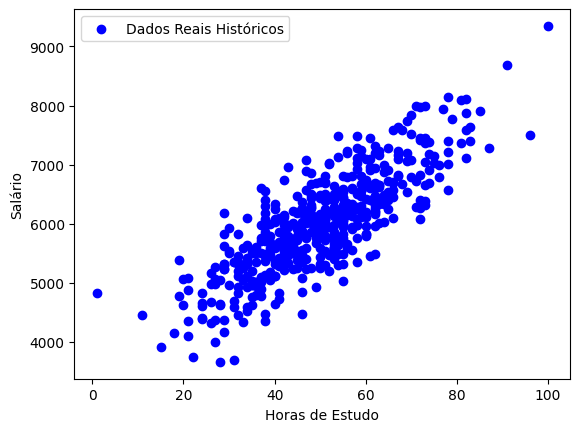

In [680]:
# Gráfico de dispersão entre x e y

plt.scatter(X, y, color = 'blue', label = 'Dados Reais Históricos')
plt.xlabel('Horas de Estudo')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [681]:
# Dividir dados em treinamento e teste

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state= 42)

In [682]:
X_treino.shape

(400, 1)

In [683]:
X_teste.shape

(100, 1)

In [684]:
y_treino.shape

(400,)

In [685]:
y_teste.shape

(100,)

In [686]:
# Cria o modelo de regressao linear simples

modelo = LinearRegression()

In [687]:
modelo

LinearRegression()

In [688]:
# Treino o modelo

modelo.fit(X_treino, y_treino)

LinearRegression()

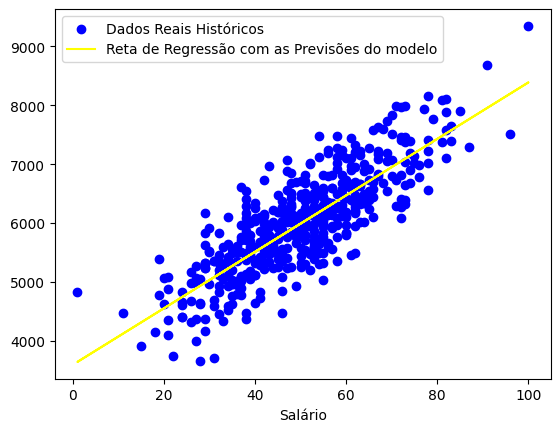

In [689]:
# Visualiza a reta de regressão linear(previsões) e os dados reais usados no treinamento

plt.scatter(X, y, color = 'blue', label = 'Dados Reais Históricos')
plt.plot(X, modelo.predict(X), color= 'yellow', label = 'Reta de Regressão com as Previsões do modelo')
plt.xlabel('Horas de Estudo')
plt.xlabel('Salário')
plt.legend()
plt.show()

In [690]:
# Avalia o modelo nos dados de teste(porcentagem de acerto)

score = modelo.score(X_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.61


In [691]:
# Intercepto - parametro wo

modelo.intercept_

np.float64(3594.435751534045)

In [692]:
# Slope - parametro w1

modelo.coef_

array([47.9335113])

In [693]:
# Defina um novo valor para horas de estudo
horas_estudo_novo = np.array([[1]])

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(salario_previsto)

[3642.36926283]
